In [1]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
Numpy Version 1.21.5
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [3]:
from Scripts.nonparanormal_skeptic import nonparanormal_skeptic
from Scripts.anBiGLasso_cov import anBiGLasso
from Scripts.EiGLasso import EiGLasso_cov as EiGLasso
from Scripts.scBiGLasso import scBiGLasso_cov as scBiGLasso
from Scripts.utilities import binarize_matrix

In [4]:
np.set_printoptions(precision=3, suppress=True)
%load_ext line_profiler
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

# COIL Data
From the 'processed' dataset available here: https://cave.cs.columbia.edu/repository/COIL-20

We only look at the duck data.

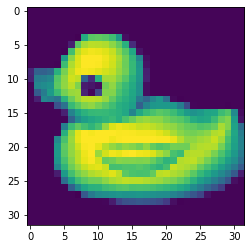

In [72]:
# Here we load the image, and then drop every second pixel to reduce the image size
# to be a more manageable 32 by 32.  In the BiGLasso paper, they considered 9 by 9
import glob
files = sorted(glob.glob('../../Data/coil-20-proc/*.png'))
duck_mat = np.array(
    [np.array(Image.open(f))[::4, ::4].reshape(32*32) for f in files]
).reshape((20, 72, 32*32))
duck_mat.shape # object, frame, flattened pixel
plt.imshow(duck_mat[10, 0].reshape(32, 32))

In [84]:
T, S = nonparanormal_skeptic(duck_mat[10][np.newaxis, ...]) 

In [85]:
from Scripts.anBiGLasso_cov import calculateEigenvalues, eigenvalues_MLE
# Runtime analysis
%lprun -f anBiGLasso -f calculateEigenvalues -f eigenvalues_MLE \
    anBiGLasso(T, S, beta_1 = 0.002, beta_2 = 0.002)

In [92]:
Psi, Theta = anBiGLasso(T, S, beta_1 = 0.001, beta_2 = 0.000002)

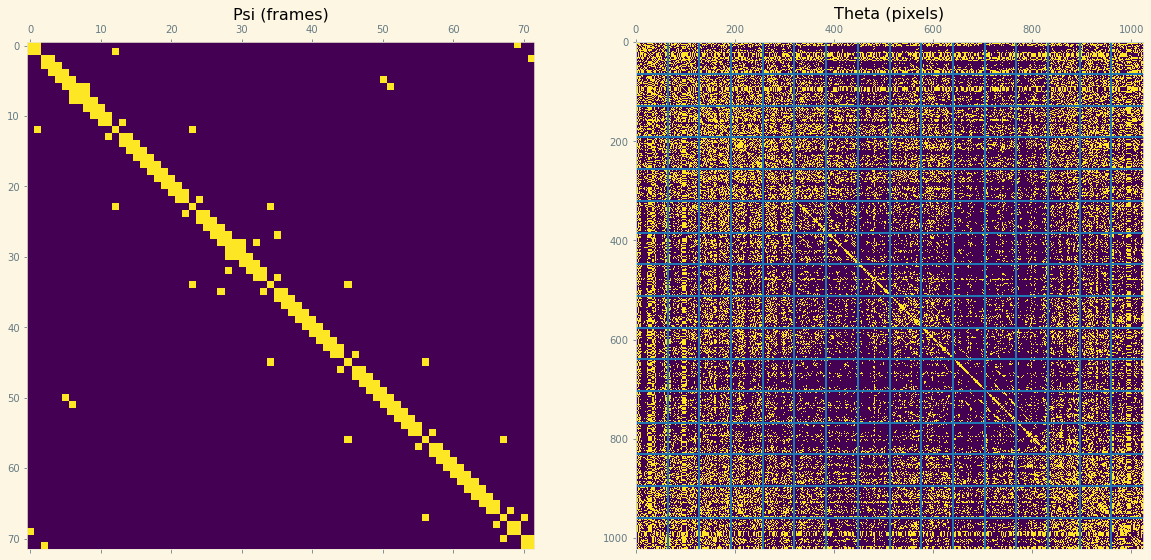

In [99]:
Psi_ = binarize_matrix(Psi, mode='Negative')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Negative')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')
    
    # Add gridlines for pixel rows
    # We skip rows b/c otherwise it would be too cluttered
    for i in range(16):
        ax2.axvline(64*i)
        ax2.axhline(64*i)